# HR ANALYTICS

# Importing Necessary Libraries


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings ('ignore')
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import re


In [26]:
df=pd.read_csv(r"C:\Users\priya\Downloads\HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
df.shape

(1470, 35)

In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##  Data Cleaning

In [31]:
df.isnull().sum() #checking for null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [32]:
#no null values present

In [33]:
df.duplicated().sum()

0

In [34]:
#no duplicate values present

# Dropping redundant columns

In [35]:
df=df.drop(['EmployeeCount'],axis=1) #unnecessary columns

# Identifying unnecessary columns

In [36]:
df1=df.copy()

In [37]:
le = LabelEncoder()
for col in df1.columns:
    df1[col] = le.fit_transform(df1[col])

In [38]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,1,2,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,2,3,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,4,0,...,3,0,1,6,3,2,2,2,2,2


In [39]:
X=df1.drop('Attrition',axis=1)

In [40]:
y=df1['Attrition']

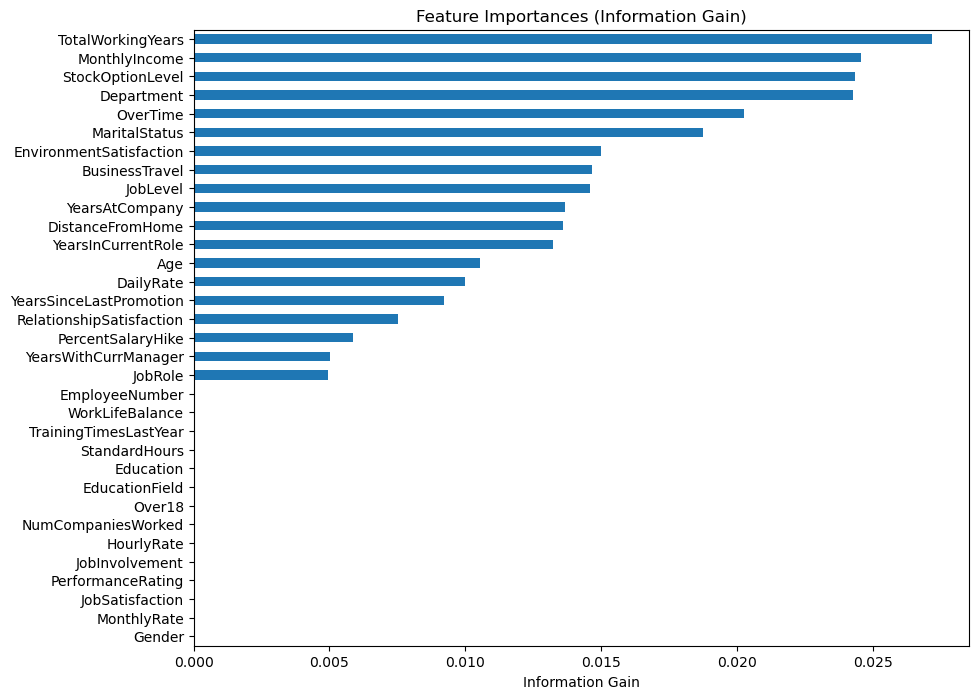

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Calculate feature importances
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, index=X.columns)
sorted_importances = feat_importances.sort_values()

# Plot horizontal bar plot for Information Gain
plt.figure(figsize=(10, 8))
sorted_importances.plot(kind='barh')
plt.xlabel('Information Gain')
plt.title('Feature Importances (Information Gain)')
plt.show()


In [48]:
imp=sorted_importances.sort_values(ascending = False)
imp

TotalWorkingYears           0.027157
MonthlyIncome               0.024573
StockOptionLevel            0.024336
Department                  0.024261
OverTime                    0.020251
MaritalStatus               0.018758
EnvironmentSatisfaction     0.014987
BusinessTravel              0.014673
JobLevel                    0.014577
YearsAtCompany              0.013675
DistanceFromHome            0.013575
YearsInCurrentRole          0.013219
Age                         0.010545
DailyRate                   0.009968
YearsSinceLastPromotion     0.009206
RelationshipSatisfaction    0.007520
PercentSalaryHike           0.005873
YearsWithCurrManager        0.005036
JobRole                     0.004959
MonthlyRate                 0.000000
EmployeeNumber              0.000000
WorkLifeBalance             0.000000
TrainingTimesLastYear       0.000000
StandardHours               0.000000
Education                   0.000000
EducationField              0.000000
Over18                      0.000000
N

In [49]:
imp_columns=imp[imp>0]
imp_columns

TotalWorkingYears           0.027157
MonthlyIncome               0.024573
StockOptionLevel            0.024336
Department                  0.024261
OverTime                    0.020251
MaritalStatus               0.018758
EnvironmentSatisfaction     0.014987
BusinessTravel              0.014673
JobLevel                    0.014577
YearsAtCompany              0.013675
DistanceFromHome            0.013575
YearsInCurrentRole          0.013219
Age                         0.010545
DailyRate                   0.009968
YearsSinceLastPromotion     0.009206
RelationshipSatisfaction    0.007520
PercentSalaryHike           0.005873
YearsWithCurrManager        0.005036
JobRole                     0.004959
dtype: float64

In [50]:
non_imp_columns=imp[imp==0]
non_imp_columns

MonthlyRate              0.0
EmployeeNumber           0.0
WorkLifeBalance          0.0
TrainingTimesLastYear    0.0
StandardHours            0.0
Education                0.0
EducationField           0.0
Over18                   0.0
NumCompaniesWorked       0.0
HourlyRate               0.0
JobInvolvement           0.0
PerformanceRating        0.0
JobSatisfaction          0.0
Gender                   0.0
dtype: float64

# Renaming the Columns

In [51]:
def format_column_name(column_name):
    return ' '.join(re.findall('[A-Z][a-z]*', column_name))
df.rename(columns=lambda x: format_column_name(x), inplace=True)

In [52]:
df.head()

,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,Education Field,Employee Number,Environment Satisfaction,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


# Data Visualization

In [53]:
df.columns

Index(['Age', 'Attrition', 'Business Travel', 'Daily Rate', 'Department',
       'Distance From Home', 'Education', 'Education Field', 'Employee Number',
       'Environment Satisfaction', 'Gender', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Role', 'Job Satisfaction', 'Marital Status',
       'Monthly Income', 'Monthly Rate', 'Num Companies Worked', 'Over',
       'Over Time', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Training Times Last Year', 'Work Life Balance',
       'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager'],
      dtype='object')

In [54]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

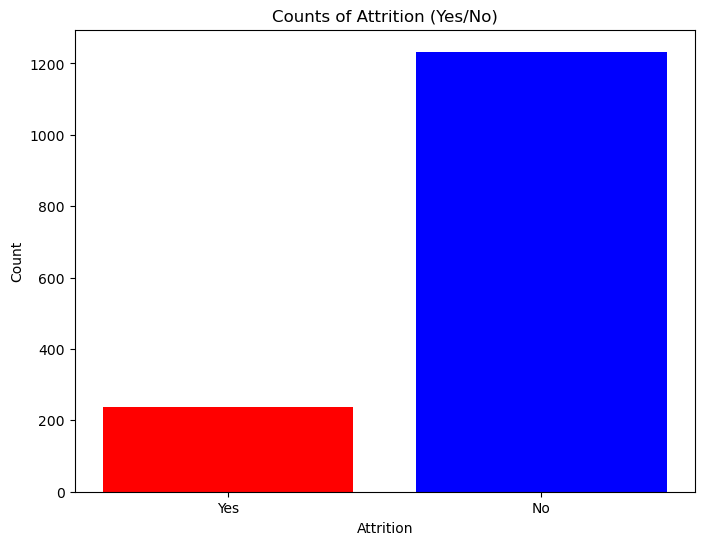

In [55]:
# Calculate counts of 'Yes' and 'No' in 'Attrition' column
count_yes = (df['Attrition'] == 'Yes').sum()
count_no = (df['Attrition'] == 'No').sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Yes', 'No'], [count_yes, count_no], color=['red', 'blue'])
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Counts of Attrition (Yes/No)')
plt.show()

([<matplotlib.patches.Wedge at 0x159a24904f0>,
 [Text(-0.5336332157899545, 0.9618916732177651, 'Attrition yes'),
  Text(0.5336332157899544, -0.9618916732177653, 'Attrition no')],
 [Text(-0.291072663158157, 0.5246681853915082, '16.1%'),
  Text(0.2910726631581569, -0.5246681853915083, '83.9%')])

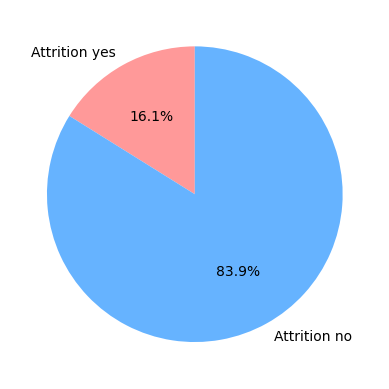

In [56]:
labels = ['Attrition yes', 'Attrition no']
sizes = [count_yes, count_no]
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

<Axes: >

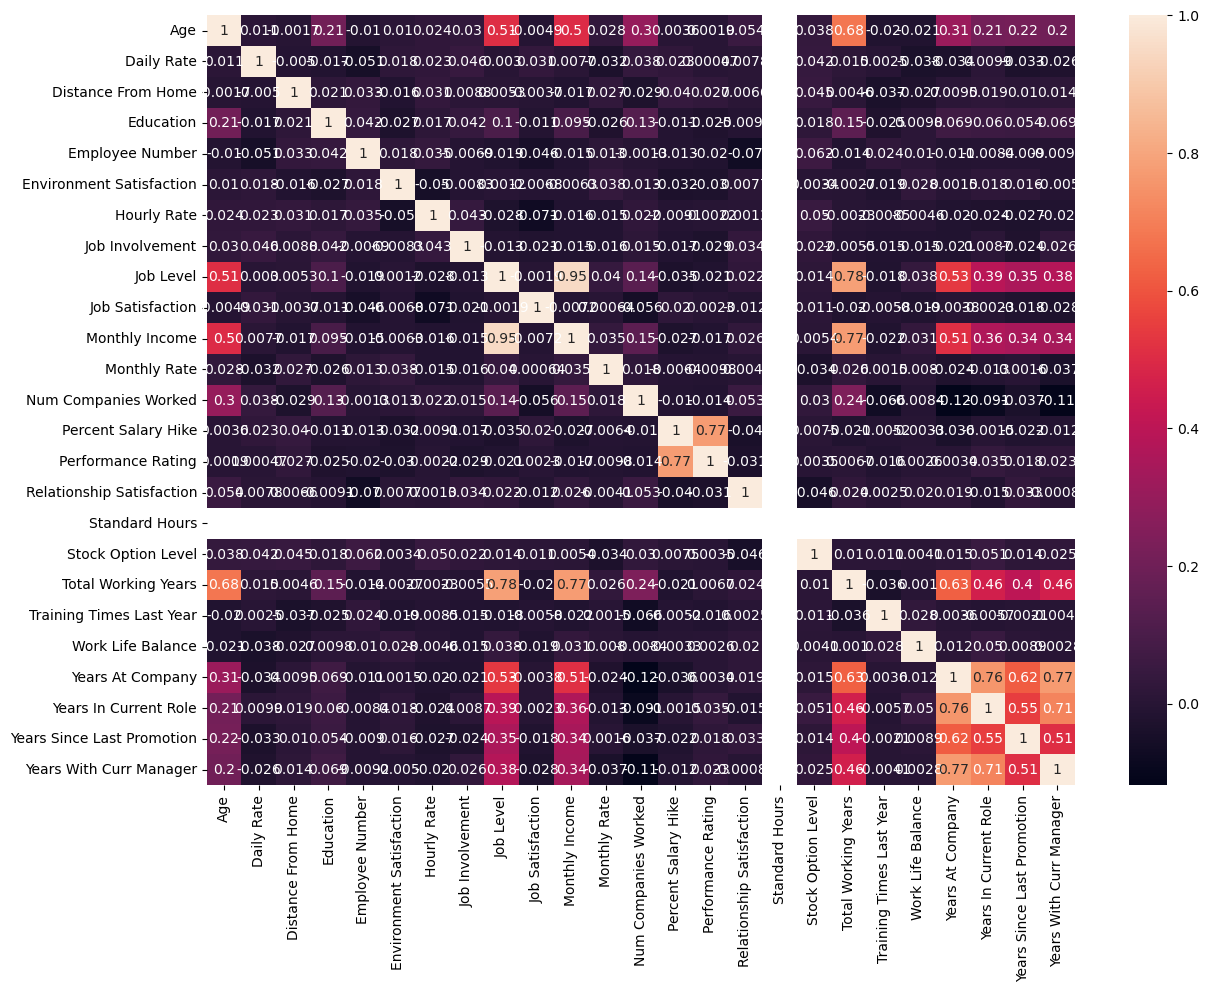

In [57]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Marital Status', ylabel='count'>

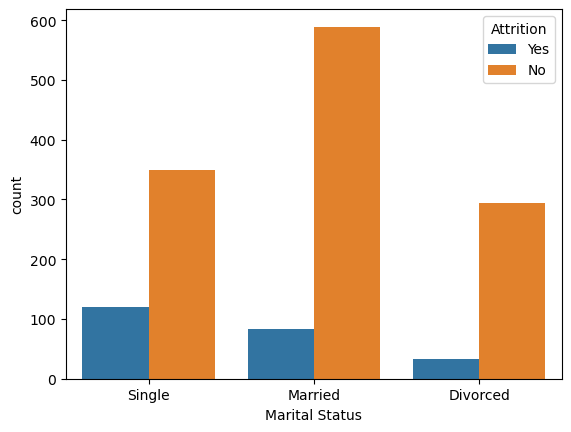

In [58]:
sns.countplot(data=df,x=df['Marital Status'],hue=df.Attrition)

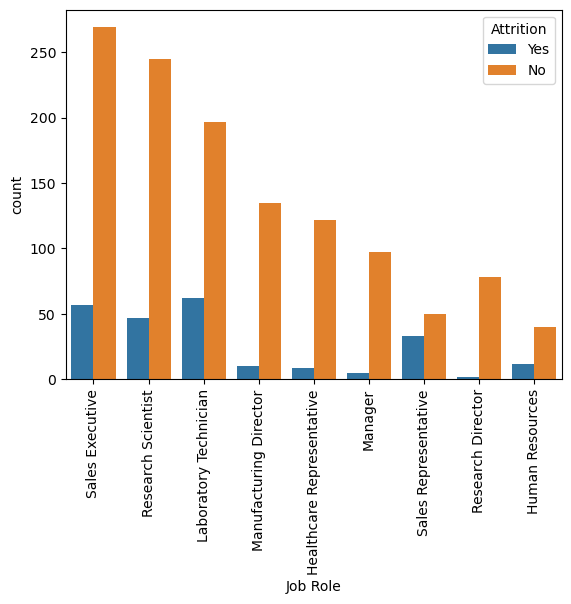

In [59]:
sns.countplot(data=df,x=df['Job Role'],hue=df.Attrition)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

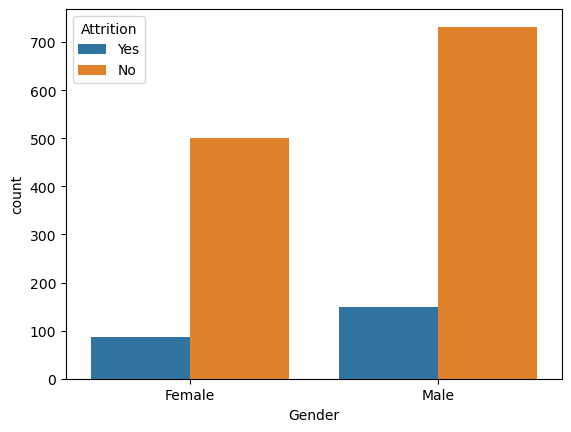

In [60]:
sns.countplot(data=df,x=df['Gender'],hue=df.Attrition)

In [61]:
df.groupby(['Gender','Attrition'])['Attrition'].size().unstack()

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


In [62]:
print('Male attrition rate= ',(150/(150+732))*100,'%')
print('Female attrition rate= ',(87/(87+501))*100,'%')

Male attrition rate=  17.006802721088434 %
Female attrition rate=  14.795918367346939 %


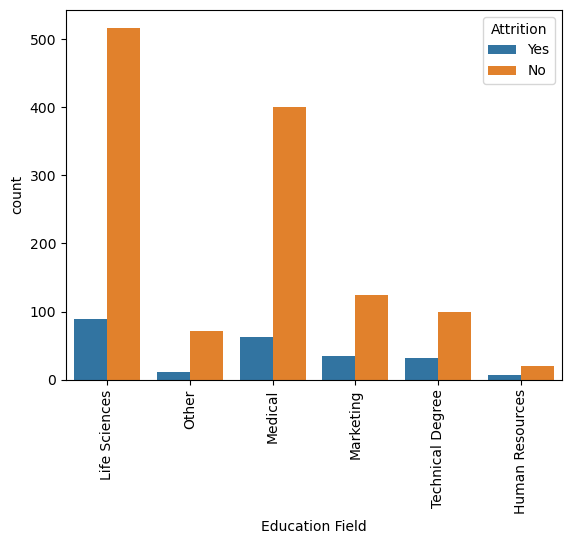

In [63]:
sns.countplot(data=df,x=df['Education Field'],hue=df.Attrition)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Business Travel', ylabel='count'>

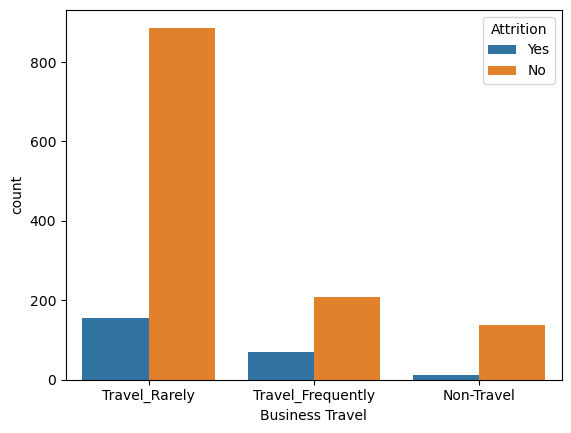

In [64]:
sns.countplot(data=df,x=df['Business Travel'],hue=df.Attrition)

More attrition is seen by people who travel very rarely for the company business

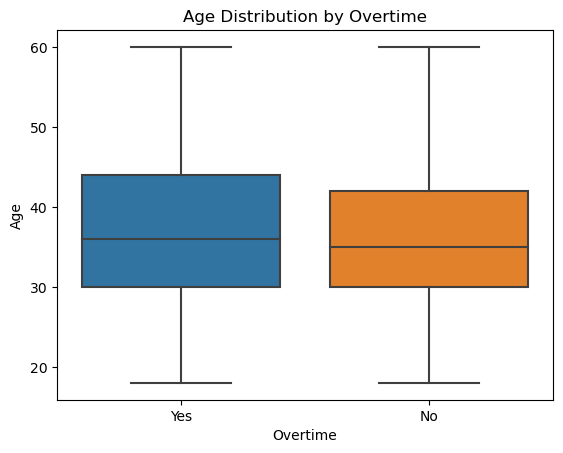

In [65]:
sns.boxplot(x='Over Time', y='Age', data=df)
plt.xlabel("Overtime")
plt.ylabel("Age")
plt.title("Age Distribution by Overtime")
plt.show()

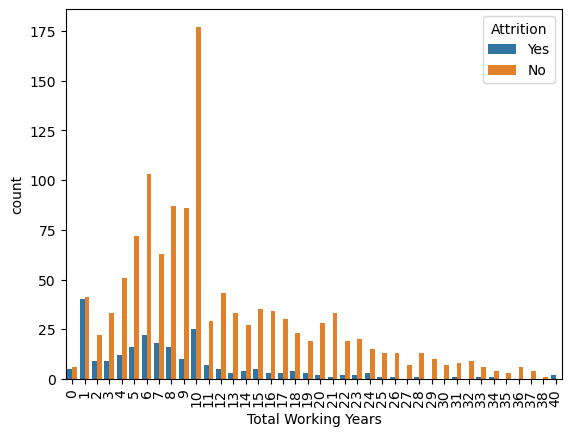

In [66]:
sns.countplot(data=df,x=df['Total Working Years'],hue=df.Attrition)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Education', ylabel='count'>

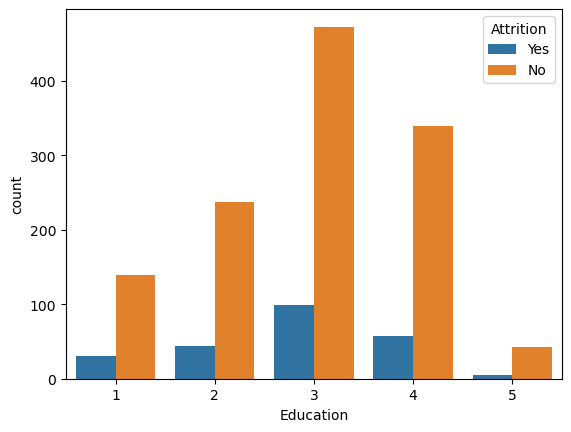

In [67]:
sns.countplot(data=df,x=df['Education'],hue=df.Attrition)

<Axes: xlabel='Num Companies Worked', ylabel='count'>

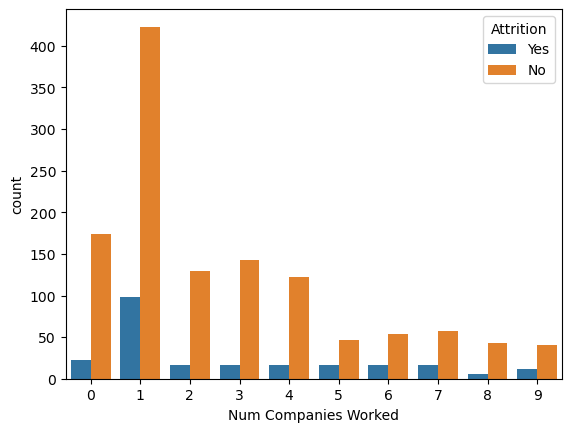

In [68]:
sns.countplot(data=df,x=df['Num Companies Worked'],hue=df.Attrition)

In [69]:
df['Distance From Home'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

<Axes: xlabel='Distance From Home', ylabel='count'>

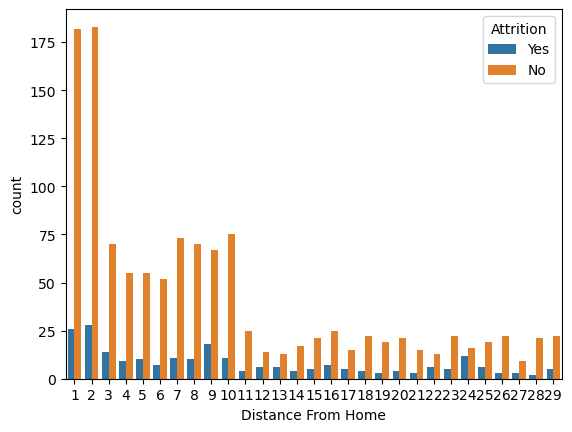

In [70]:
sns.countplot(data=df,x=df['Distance From Home'],hue=df.Attrition)

## Similar graphs are plotted along with the count of each bar in various categories as shown:

In [71]:
cat = df.select_dtypes(['object']).columns

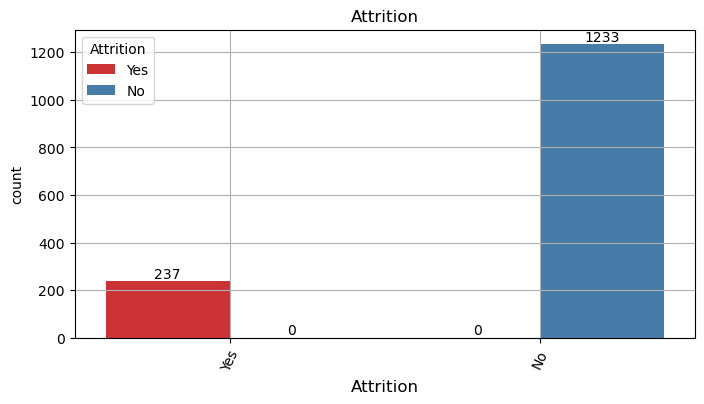

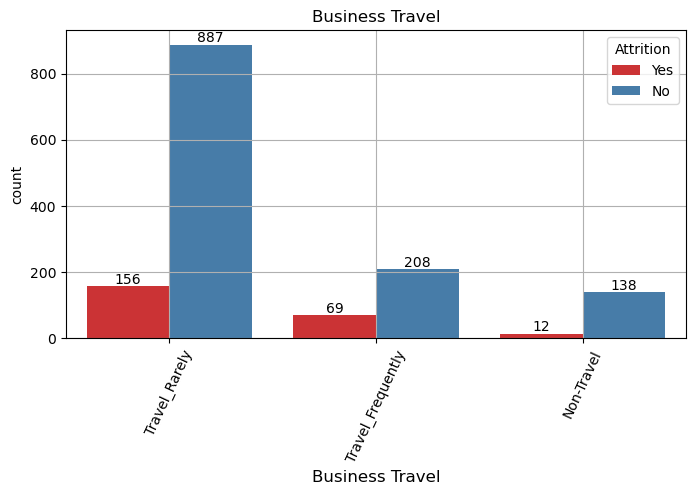

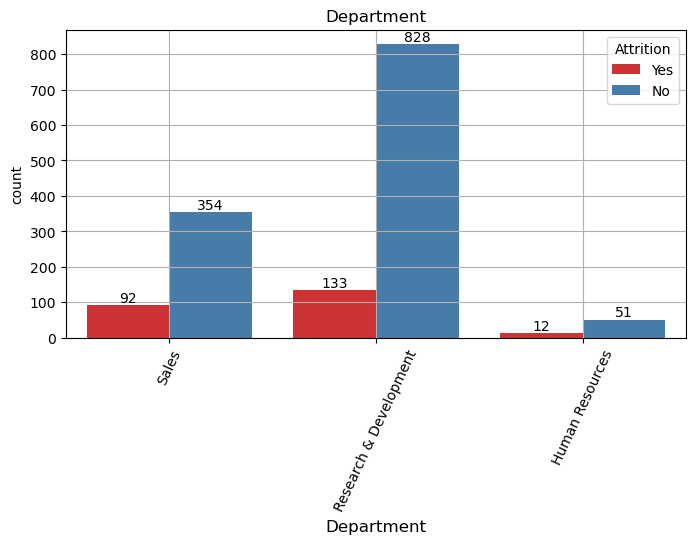

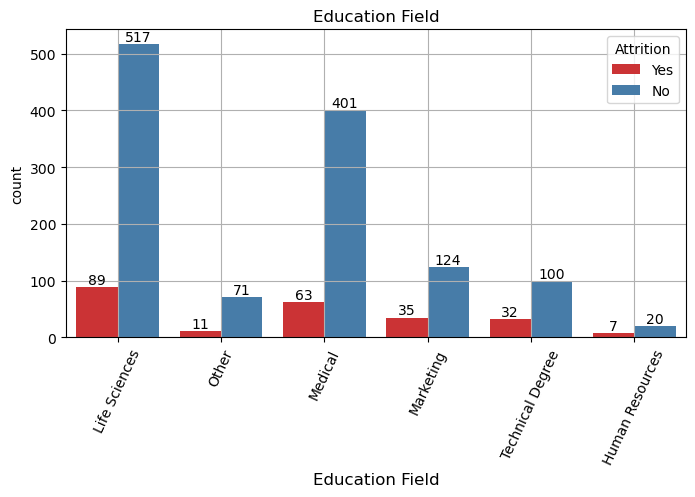

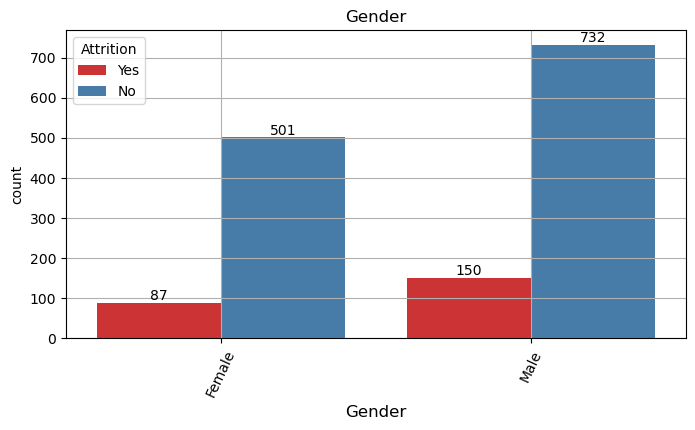

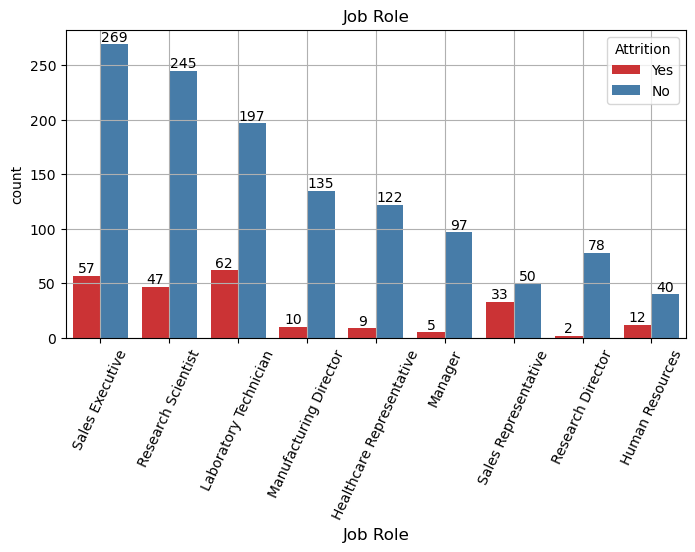

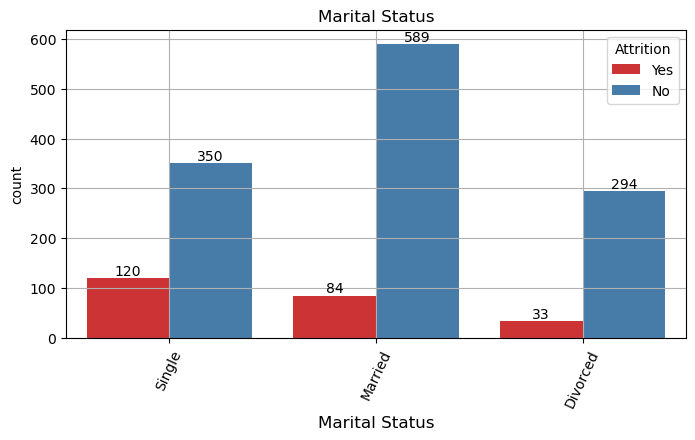

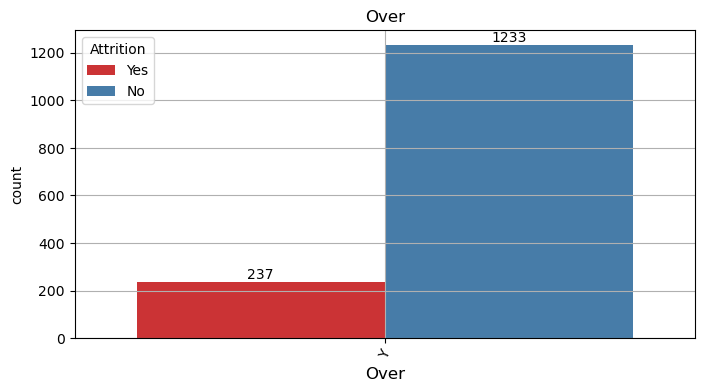

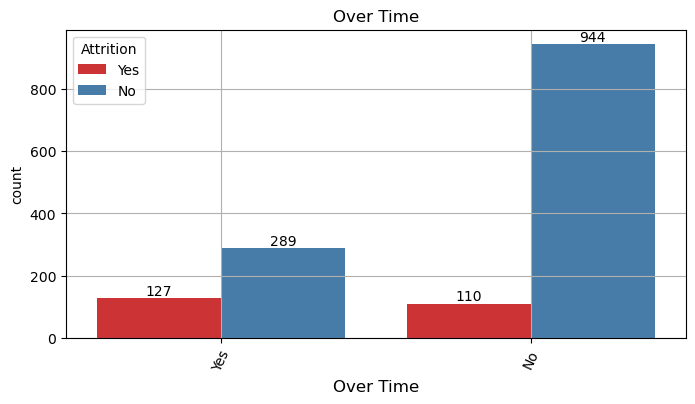

In [72]:
for column in cat : 
    plt.figure(figsize=(8,4))
    
    ax=sns.countplot(x=df[column], data=df,hue="Attrition",palette='Set1')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column)
    plt.xticks(rotation=65)
    plt.xlabel(column,fontsize=12)
    plt.grid()
    plt.show()
